The dataset has known groups- cancer and control.  We want the data to be patterened into these groups.  Therefore, the classification method of machine learning is most appropriate. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

df= pd.read_csv('breast.csv')

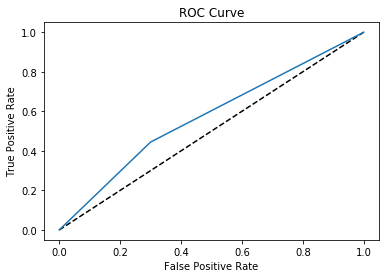

The confusion matrix for K Neighbors Classifier is listed below:
[[ 5  4]
 [14  6]]
The ROC score for the K Neighbors Classifier is 0.43 


In [24]:
y = df['Classification'].values
X = df.drop('Classification', axis=1).values
knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
y=y.ravel()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Compute predicted probabilities for positive classification: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('The confusion matrix for K Neighbors Classifier is listed below:')
print(metrics.confusion_matrix(y_test, y_pred))
print( 'The ROC score for the K Neighbors Classifier is {0:.2f} '.format(metrics.roc_auc_score(y_test, y_pred)))